In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
import os
import matplotlib.pyplot as plt
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2

1. Load newly rendered patched in & normalise to [0,1]
2. Load normal patches in
3. Load regular patches in
4. Resize to 64 x 64
5. Place in respective folders (test set = 21)

In [2]:
tonemapper = cv2.createTonemap(gamma=2.2)

In [4]:
path_rendered_patches = sorted(Path(f"interpolated-patches-per-point/").glob("**/*.exr"))

rendered_patches = [cv2.resize(cv2.imread(str(img), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH), (64,64), interpolation=cv2.INTER_CUBIC) for img in path_rendered_patches]

images = np.zeros((64, 64 * 8386, 3), dtype=np.float32)
count = 0

for i in range(0, 64 * 8386, 64):
    img = rendered_patches[count]
    images[:,i:i+64,:] = img
    count += 1

images_tonemapped = tonemapper.process(images.copy())

[ WARN:0@104.616] global matrix_expressions.cpp:1333 assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739


In [6]:
images_tonemapped_split = np.zeros((8386, 64, 64, 3), dtype=np.float32)
count = 0
for i in range(0, 64 * 8386, 64):
    img = images_tonemapped[:,i:i+64,:]
    images_tonemapped_split[count] = img
    count += 1

In [7]:
images_tonemapped_split[0].shape

(64, 64, 3)

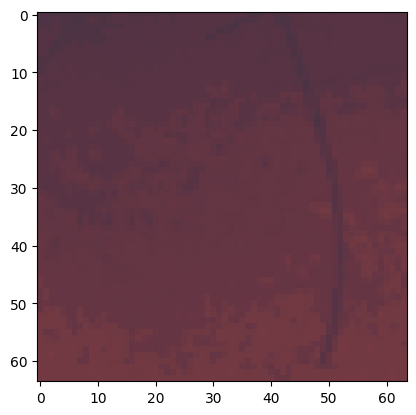

In [8]:
plt.imshow(cv2.cvtColor(images_tonemapped_split[0], cv2.COLOR_BGR2RGB))

In [10]:
#cv2.imwrite('test_image.bmp',np.clip(images_tonemapped_split[0]*255, 0, 255).astype(np.uint8))

True

1. completed

In [24]:
path_linear_patches = sorted(Path(f"linear_patches/").glob("**/*.bmp"))
path_normal_patches = sorted(Path(f"normal_patches/").glob("**/*.bmp"))
path_rendered_patches = sorted(Path(f"interpolated-patches-per-point/").glob("**/*.exr"))

rendered_patches = [cv2.imread(str(img), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH) for img in path_rendered_patches]
linear_patches = [cv2.imread(str(img), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH) for img in path_linear_patches]
normal_patches = [cv2.imread(str(img), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH) for img in path_normal_patches]

2-4 completed

In [25]:
S021_indices = []
for i, path in enumerate(path_linear_patches):
    if 'S021' in path.parts:
        S021_indices.append(i)

In [28]:
for i in range(len(path_linear_patches)):
    if i not in S021_indices:
        cv2.imwrite(f'p2p/trainA/{i}.exr',rendered_patches[i])
        cv2.imwrite(f'p2p/trainB/{i}.bmp',linear_patches[i])
        cv2.imwrite(f'p2p/trainN/{i}.bmp',normal_patches[i])
    else:
        cv2.imwrite(f'p2p/testA/{i}.exr',rendered_patches[i])
        cv2.imwrite(f'p2p/testB/{i}.bmp',linear_patches[i])
        cv2.imwrite(f'p2p/testN/{i}.bmp',normal_patches[i])